In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np


In [3]:
# generate tranformed dataframe 
data = pd.read_csv("../Data/Batter Data/2023_Springer.csv")
variables = ['plate_x', 'plate_z', 'release_speed', 'type', 'release_pos_x', 'release_pos_z', 'release_pos_y', 'p_throws']
data = data[variables]
data['hit'] = data['type'].apply(lambda x: 1 if x == "X" else 0)
data['p_throws'] = data['p_throws'].apply(lambda x: 1 if x == 'R' else 0)
data = data.drop(columns=['type'])
data

,plate_x,plate_z,release_speed,release_pos_x,release_pos_z,release_pos_y,p_throws,hit
0,0.75,2.66,86.1,-1.45,4.97,53.72,1,1
1,1.15,2.57,84.3,-1.57,5.01,53.72,1,0
2,2.39,1.79,85.7,-1.51,5.03,53.69,1,0
3,-1.51,3.75,86.7,-1.51,5.15,53.84,1,0
4,0.38,2.55,84.4,-1.76,5.00,54.04,1,1
...,...,...,...,...,...,...,...,...
2523,0.93,2.37,89.6,-1.65,6.44,54.33,1,0
2524,-0.76,2.12,100.3,-2.34,5.97,54.05,1,0
2525,-0.26,2.15,99.5,-2.35,5.93,53.94,1,0
2526,0.46,1.59,93.3,-2.17,6.44,54.06,1,0


In [4]:
# normalize data
variables = ['plate_x', 'plate_z', 'release_speed', 'release_pos_x', 'release_pos_z', 'release_pos_y']
for var in variables:
    data[var] = (data[var] - data[var].mean())/data[var].std()

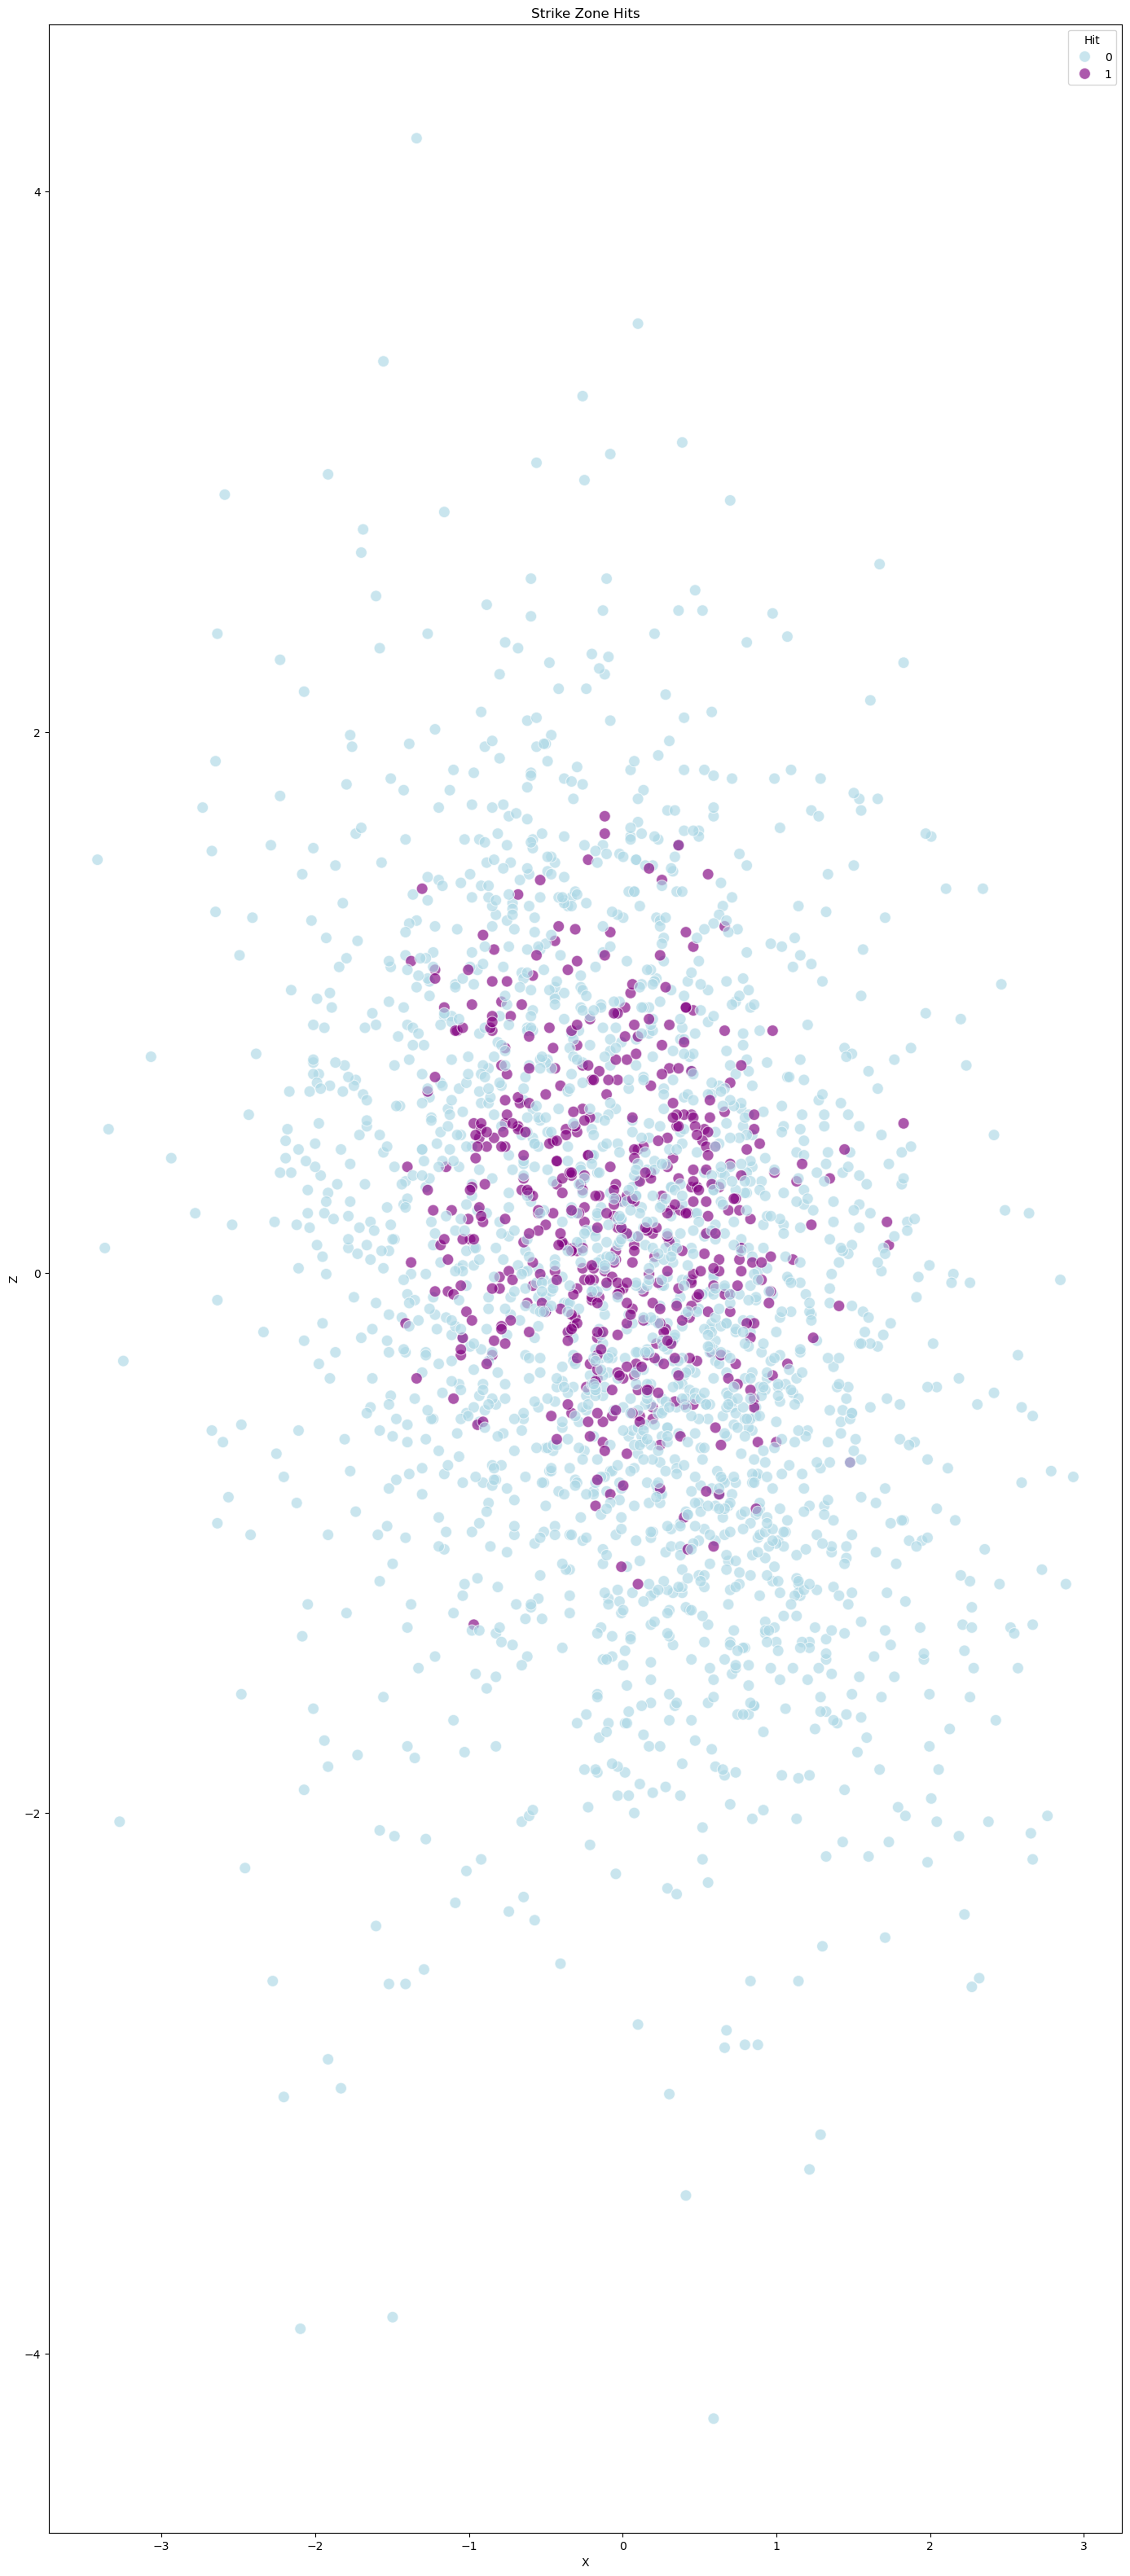

In [5]:
# graph (x,z) locations and hits at the strikezone 
color_palette = {0: 'lightblue', 1: 'purple'}
plt.figure(figsize=(17, 40))
sns.scatterplot(data=data, x='plate_x', y='plate_z', palette=color_palette, hue='hit', alpha=0.65, s=100)
plt.xlabel("X")
plt.ylabel("Z")
plt.title('Strike Zone Hits')
plt.legend(title="Hit")

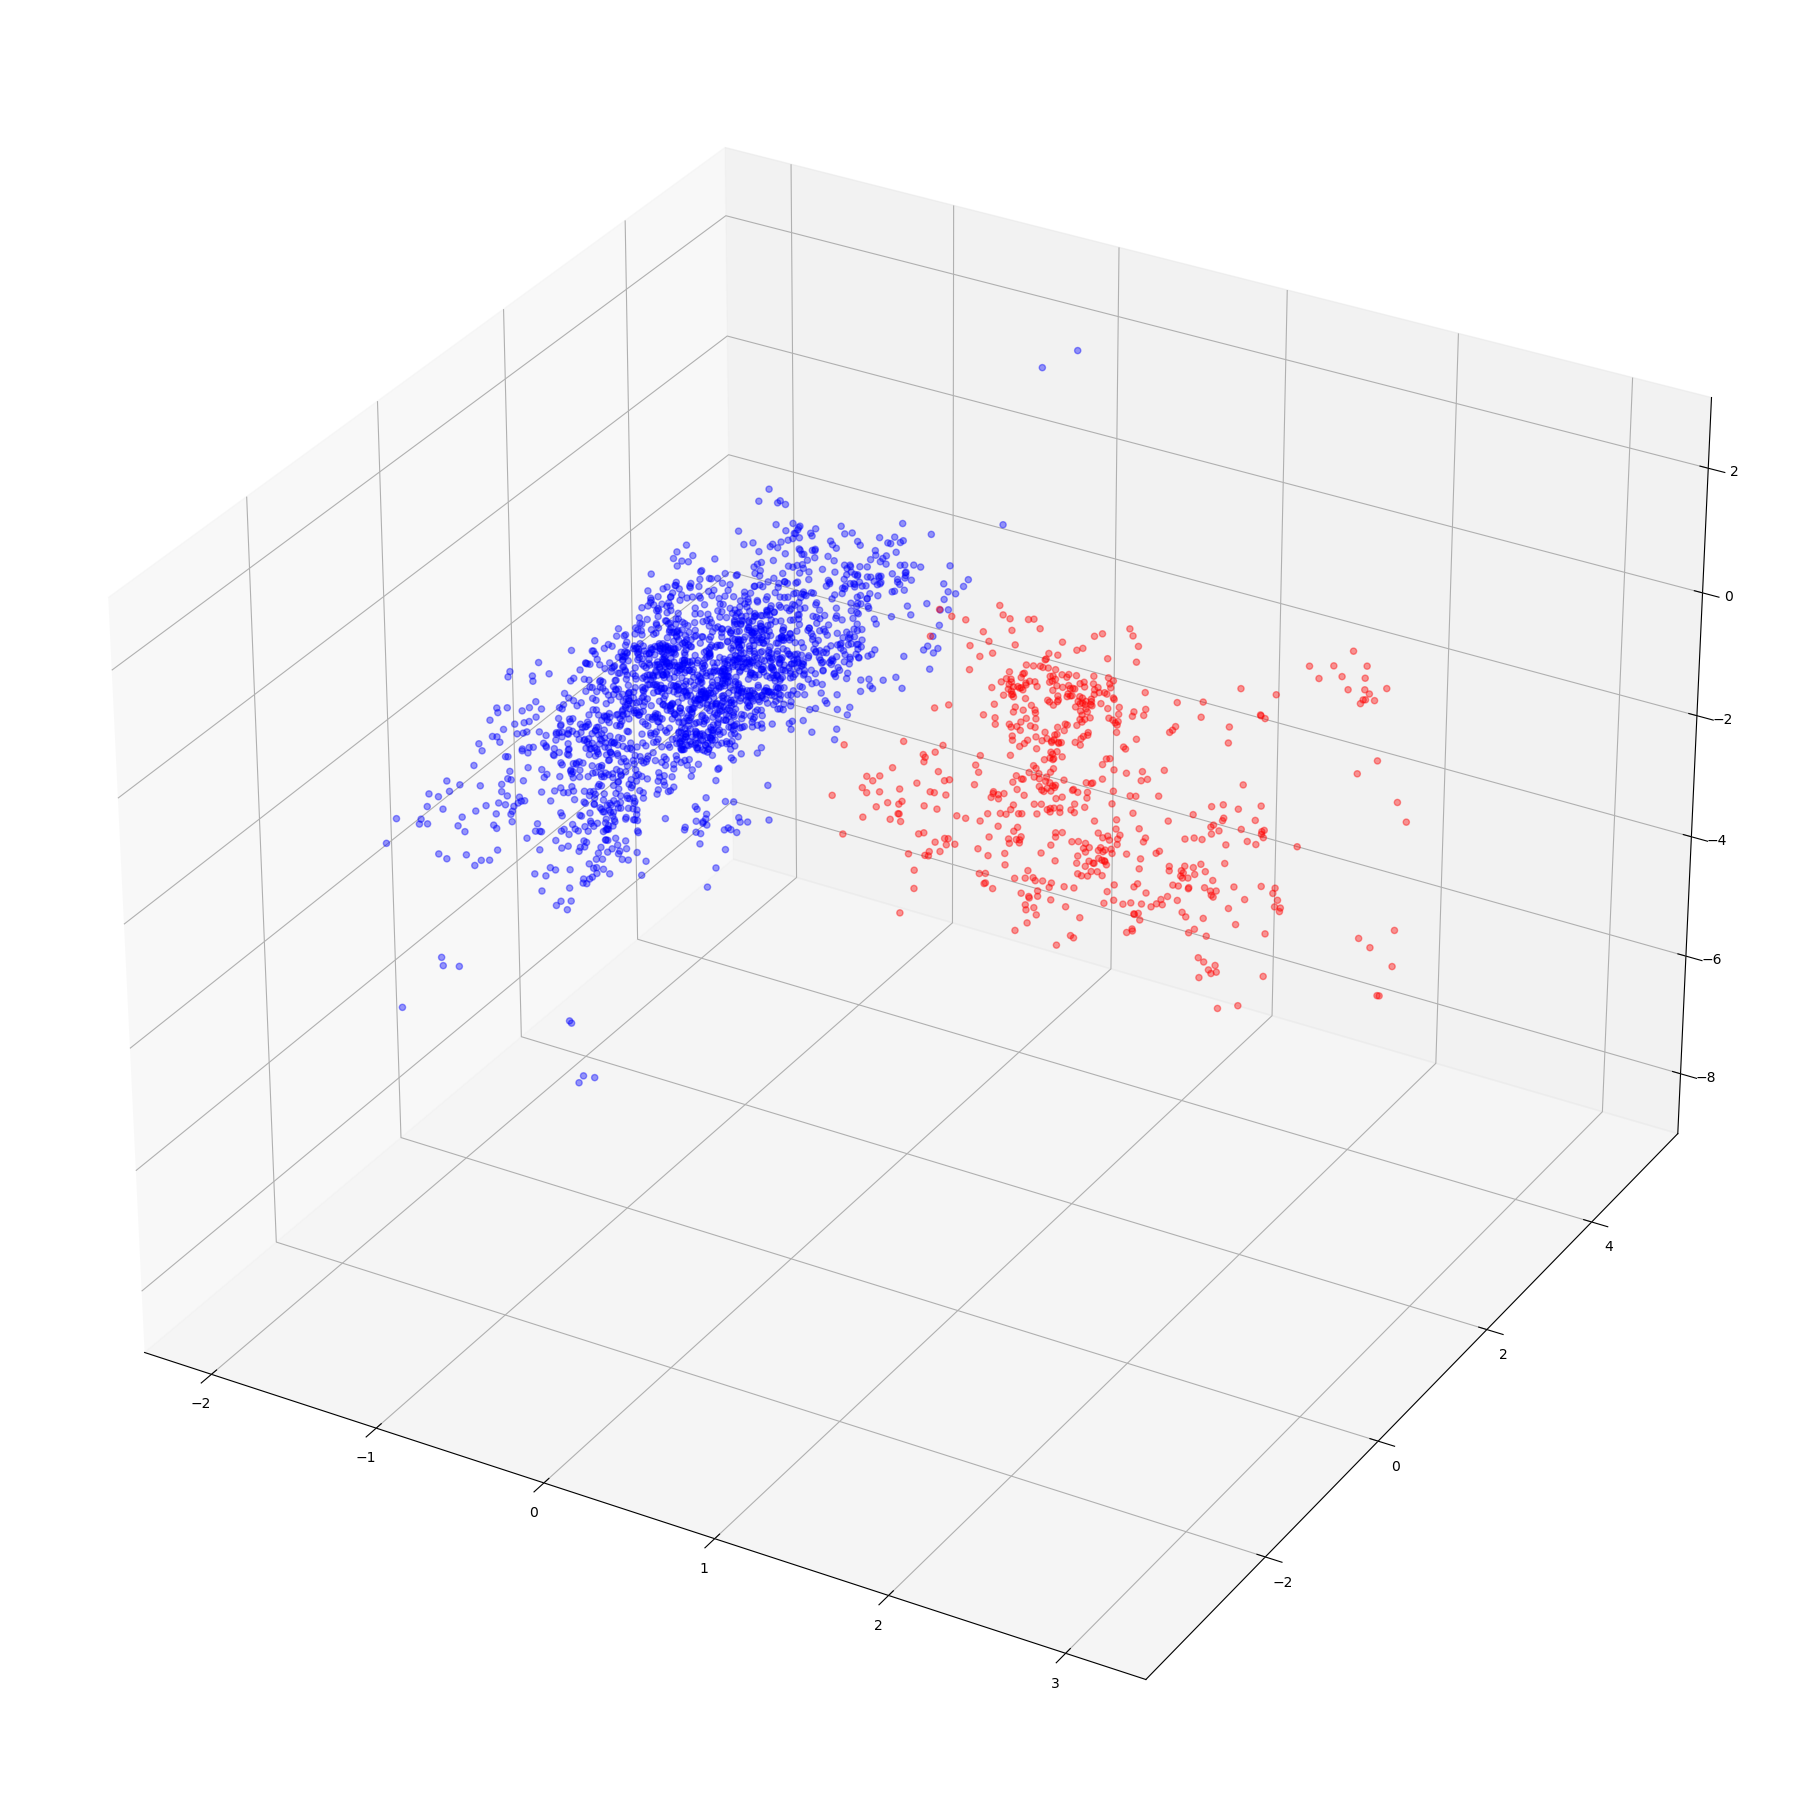

In [6]:
# graph ball release position
fig = plt.figure(figsize=(23, 25))
color_palette = {1: 'blue', 0: 'red'}
ax = fig.add_subplot(projection='3d')
ax.scatter(data['release_pos_x'], data['release_pos_y'], data['release_pos_z'],
            c=data['p_throws'].map(color_palette),
            alpha=0.4)


In [7]:
# shuffle the data randomly. 
data_array = data.values
np.random.seed(42)
np.random.shuffle(data_array)
data = tf.constant(data_array, dtype=tf.float32)

In [8]:
# split data into training, testing, and validation sets. 
train_percent = 0.8
val_percent = 0.1

train_index = int(train_percent * len(data))
val_index = int(val_percent * len(data)) + train_index

X_train, Y_train = data[:train_index, :-1], data[:train_index, -1:]
X_valid, Y_valid = data[train_index:val_index, :-1], data[train_index:val_index, -1:]
X_test, Y_test = data[val_index:, :-1], data[val_index:, -1:]

print("data : ", data.shape)
print("X_train : ", X_train.shape)
print("Y_train : ", Y_train.shape)
print("X_valid : ", X_valid.shape)
print("Y_valid : ", Y_valid.shape)
print("X_test : ", X_test.shape)
print("Y_test : ", Y_test.shape)

data :  (2528, 8)
X_train :  (2022, 7)
Y_train :  (2022, 1)
X_valid :  (252, 7)
Y_valid :  (252, 1)
X_test :  (254, 7)
Y_test :  (254, 1)


In [16]:
# basic model
input_shape = (7, )
model = tf.keras.Sequential([
    tf.keras.layers.Dense(7, activation='relu', input_shape=input_shape),
    tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1)
])

# complie the model
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae', 'accuracy'])

# train model
history = model.fit(X_train, Y_train,
                    epochs=30,
                    batch_size=30,
                    validation_data=(X_valid, Y_valid))

# evaluate model
loss, mae, accuracy = model.evaluate(X_test, Y_test)
# current accuracy : 83% 

Epoch 1/30
68/68 [==============================] - 0s 2ms/step - loss: 0.1757 - mae: 0.2704 - accuracy: 0.7992 - val_loss: 0.1547 - val_mae: 0.2762 - val_accuracy: 0.8135
Epoch 2/30
68/68 [==============================] - 0s 808us/step - loss: 0.1657 - mae: 0.3077 - accuracy: 0.7982 - val_loss: 0.1522 - val_mae: 0.2923 - val_accuracy: 0.8135
Epoch 3/30
68/68 [==============================] - 0s 784us/step - loss: 0.1628 - mae: 0.3098 - accuracy: 0.7982 - val_loss: 0.1510 - val_mae: 0.3012 - val_accuracy: 0.8135
Epoch 4/30
68/68 [==============================] - 0s 842us/step - loss: 0.1615 - mae: 0.3147 - accuracy: 0.7982 - val_loss: 0.1501 - val_mae: 0.3012 - val_accuracy: 0.8135
Epoch 5/30
68/68 [==============================] - 0s 859us/step - loss: 0.1607 - mae: 0.3146 - accuracy: 0.7982 - val_loss: 0.1495 - val_mae: 0.2997 - val_accuracy: 0.8135
Epoch 6/30
68/68 [==============================] - 0s 868us/step - loss: 0.1601 - mae: 0.3130 - accuracy: 0.7982 - val_loss: 0.1492